In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/aseemshukla/.pyenv/versions/3.7.1/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility.csv')

In [4]:
df.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_adult_covid_suspected_40-49_7_day_sum,previous_day_admission_adult_covid_suspected_50-59_7_day_sum,previous_day_admission_adult_covid_suspected_60-69_7_day_sum,previous_day_admission_adult_covid_suspected_70-79_7_day_sum,previous_day_admission_adult_covid_suspected_80+_7_day_sum,previous_day_admission_adult_covid_suspected_unknown_7_day_sum,previous_day_admission_pediatric_covid_suspected_7_day_sum,previous_day_total_ED_visits_7_day_sum,previous_day_admission_influenza_confirmed_7_day_sum,geocoded_hospital_address
0,452122,2021/03/12,TX,452122,El Paso LTAC Hospital,NaN,NaN,79902.0,Long Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-106.49529 31.778622)
1,9922a3f069ff4686fe467885206fb1172f609233cfe517...,2021/03/12,PR,NaN,Centro Medico Correccional de Bayamon,NaN,NaN,960.0,Short Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-66.158248 18.398847)
2,976b4ce7c95e1cd394112ce7762ed040f18a141e56a52e...,2021/03/12,PR,NaN,Hospital Industrial C.F.S.E,Paseo Dr. Jose Celso Barbosa,San Juan,935.0,Short Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,aab2bb3ab769da90baf57242c96ec481afb5ec6a233784...,2021/03/12,LA,NaN,Crescent City Surgical Centre,NaN,NaN,70118.0,Short Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-90.123884 29.949725)
4,36db6bad3679dfdcccc301fc608438109ad907943c702f...,2021/03/12,PR,NaN,CDT Susana Centeno,NaN,NaN,765.0,Short Term,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,0.0,POINT (-66.414655 18.215692)


In [5]:
# filter down to just NYC by fips code, from here: https://en.wikipedia.org/wiki/List_of_counties_in_New_York

nyc_fips = [36005 # Bronx
            ,36061 # NY
            ,36081 # Queens
           ,36047 # Kings
           ,36085 # Richmond
           ]

df = df[df['fips_code'].isin(nyc_fips)]

In [6]:
df.collection_week.unique()

array(['2021/03/12', '2021/03/05', '2021/02/26', '2021/02/19',
       '2021/02/12', '2021/02/05', '2021/01/29', '2021/01/22',
       '2021/01/15', '2021/01/08', '2021/01/01', '2020/12/25',
       '2020/12/18', '2020/12/11', '2020/12/04', '2020/11/27',
       '2020/11/20', '2020/11/13', '2020/11/06', '2020/10/30',
       '2020/10/23', '2020/10/16', '2020/10/09', '2020/10/02',
       '2020/09/25', '2020/09/18', '2020/09/11', '2020/09/04',
       '2020/08/28', '2020/08/21', '2020/08/14', '2020/08/07',
       '2020/07/31'], dtype=object)

In [6]:
# filter to just everything from mid-Dec onward
df = df[df['collection_week']>='2020/12/18']

In [33]:
df[df['hospital_name']=='NEW YORK-PRESBYTERIAN HOSPITAL'].iloc[:,8:16]

,hospital_subtype,fips_code,is_metro_micro,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg
3041,Short Term,36061.0,True,3554.0,2924.0,2668.0,2540.4,2122.4
8054,Short Term,36061.0,True,3552.0,2922.0,2666.0,2564.0,2144.3
13070,Short Term,36061.0,True,3552.6,2922.6,2666.6,2565.1,2130.0
18092,Short Term,36061.0,True,3529.7,2901.9,2646.0,2539.3,2111.3
23119,Short Term,36061.0,True,3520.0,2893.0,2637.0,2433.3,2028.9
28130,Short Term,36061.0,True,3520.0,2893.0,2637.0,2512.4,2097.4
33147,Short Term,36061.0,True,3518.9,2888.0,2632.0,2454.3,2069.6
38169,Short Term,36061.0,True,3523.3,2892.1,2636.1,2501.6,2105.0
43188,Short Term,36061.0,True,3520.0,2889.0,2633.0,2437.1,2070.9
48205,Short Term,36061.0,True,3520.3,2889.3,2633.3,2393.3,2029.0


In [9]:
df.columns

Index(['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name',
       'address', 'city', 'zip', 'hospital_subtype', 'fips_code',
       'is_metro_micro', 'total_beds_7_day_avg',
       'all_adult_hospital_beds_7_day_avg',
       'all_adult_hospital_inpatient_beds_7_day_avg',
       'inpatient_beds_used_7_day_avg',
       'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_adult_patients_hospitalized_confirmed_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg',
       'total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg',
       'inpatient_beds_7_day_avg', 'total_icu_beds_7_day_avg',
       'total_staffed_adult_icu_beds_7_day_avg', 'icu_beds_used_7_day_avg',
       'staffed_adult_icu_bed_occupancy_7_day_avg',
       'staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg',
       'staffed_icu_adult_p

In [37]:
# which hospitals have no location?

df[df['geocoded_hospital_address'].isna()].head(10)

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_adult_covid_suspected_40-49_7_day_sum,previous_day_admission_adult_covid_suspected_50-59_7_day_sum,previous_day_admission_adult_covid_suspected_60-69_7_day_sum,previous_day_admission_adult_covid_suspected_70-79_7_day_sum,previous_day_admission_adult_covid_suspected_80+_7_day_sum,previous_day_admission_adult_covid_suspected_unknown_7_day_sum,previous_day_admission_pediatric_covid_suspected_7_day_sum,previous_day_total_ED_visits_7_day_sum,previous_day_admission_influenza_confirmed_7_day_sum,geocoded_hospital_address
2961,332006,2021/03/12,NY,332006,CALVARY HOSPITAL INC,1740 - 70 EASTCHESTER R0AD,BRONX,10461.0,Long Term,36005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2967,330385,2021/03/12,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE & 210TH STREET,BRONX,10467.0,Short Term,36005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,576.0,0.0,NaN
3039,330024,2021/03/12,NY,330024,MOUNT SINAI HOSPITAL,ONE GUSTAVE L LEVY PLACE,NEW YORK,10029.0,Short Term,36061.0,...,-999999.0,4.0,5.0,6.0,4.0,0.0,4.0,4109.0,0.0,NaN
3066,330195,2021/03/12,NY,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,11040.0,Short Term,36081.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,0.0,-999999.0,4177.0,0.0,NaN
3070,330055,2021/03/12,NY,330055,NEW YORK-PRESBYTERIAN/QUEENS,56-45 MAIN STREET,FLUSHING,11355.0,Short Term,36081.0,...,0.0,0.0,0.0,-999999.0,0.0,0.0,0.0,1677.0,0.0,NaN
7985,332006,2021/03/05,NY,332006,CALVARY HOSPITAL INC,1740 - 70 EASTCHESTER R0AD,BRONX,10461.0,Long Term,36005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7986,330385,2021/03/05,NY,330385,NORTH CENTRAL BRONX HOSPITAL,3424 KOSSUTH AVENUE & 210TH STREET,BRONX,10467.0,Short Term,36005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,605.0,0.0,NaN
8056,330024,2021/03/05,NY,330024,MOUNT SINAI HOSPITAL,ONE GUSTAVE L LEVY PLACE,NEW YORK,10029.0,Short Term,36061.0,...,0.0,7.0,-999999.0,-999999.0,4.0,0.0,-999999.0,3948.0,0.0,NaN
8085,330195,2021/03/05,NY,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,11040.0,Short Term,36081.0,...,-999999.0,-999999.0,0.0,-999999.0,-999999.0,0.0,5.0,3949.0,0.0,NaN
8090,330055,2021/03/05,NY,330055,NEW YORK-PRESBYTERIAN/QUEENS,56-45 MAIN STREET,FLUSHING,11355.0,Short Term,36081.0,...,0.0,0.0,0.0,-999999.0,0.0,0.0,0.0,1625.0,0.0,NaN


In [7]:
# code their locations manually, sourced from Google Maps
# create dict
locs = {
    'CALVARY HOSPITAL INC':'POINT (-73.84404860297437 40.84823562129306)',
    'NORTH CENTRAL BRONX HOSPITAL':'POINT (-73.88108250297297 40.88078958599722)',
    'MOUNT SINAI HOSPITAL':'POINT (-73.95293294771362 40.79025685781565)',
    'LONG ISLAND JEWISH MEDICAL CENTER':'POINT (-73.70835081831994 40.754508787954556)',
    'NEW YORK-PRESBYTERIAN/QUEENS':'POINT (-73.82525511455265 40.748180495849915)'
}

# fill na with dict values
df['geocoded_hospital_address'] = df['geocoded_hospital_address'].fillna(df['hospital_name'].map(locs))

In [39]:
df.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,...,previous_day_admission_adult_covid_suspected_40-49_7_day_sum,previous_day_admission_adult_covid_suspected_50-59_7_day_sum,previous_day_admission_adult_covid_suspected_60-69_7_day_sum,previous_day_admission_adult_covid_suspected_70-79_7_day_sum,previous_day_admission_adult_covid_suspected_80+_7_day_sum,previous_day_admission_adult_covid_suspected_unknown_7_day_sum,previous_day_admission_pediatric_covid_suspected_7_day_sum,previous_day_total_ED_visits_7_day_sum,previous_day_admission_influenza_confirmed_7_day_sum,geocoded_hospital_address
2961,332006,2021/03/12,NY,332006,CALVARY HOSPITAL INC,1740 - 70 EASTCHESTER R0AD,BRONX,10461.0,Long Term,36005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-73.84404860297437 40.84823562129306)
2962,330059,2021/03/12,NY,330059,MONTEFIORE MEDICAL CENTER,111 EAST 210TH STREET,BRONX,10467.0,Short Term,36005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4660.0,0.0,POINT (-73.879975 40.879777)
2963,330080,2021/03/12,NY,330080,LINCOLN MEDICAL & MENTAL HEALTH CENTER,234 EAST 149TH STREET,BRONX,10451.0,Short Term,36005.0,...,-999999.0,-999999.0,0.0,0.0,0.0,0.0,0.0,2060.0,0.0,POINT (-73.924072 40.817681)
2964,330009,2021/03/12,NY,330009,BRONXCARE HOSPITAL CENTER,1276 FULTON AVENUE,BRONX,10456.0,Short Term,36005.0,...,-999999.0,-999999.0,-999999.0,-999999.0,-999999.0,0.0,-999999.0,632.0,-999999.0,POINT (-73.903756 40.83175)
2965,330399,2021/03/12,NY,330399,ST BARNABAS HOSPITAL,4422 THIRD AVENUE,BRONX,10457.0,Short Term,36005.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1093.0,0.0,POINT (-73.892168 40.85277)


In [8]:
# drop LI Jewish, since it's actually in Nassau County
df = df[df['hospital_name']!='LONG ISLAND JEWISH MEDICAL CENTER']

# drop hospitals showing a value of -999,999 for either metrics
df = df[df['total_icu_beds_7_day_avg']!=-999999]
df = df[df['icu_beds_used_7_day_avg']!=-999999]

In [54]:
df['geocoded_hospital_address'].str[7:].str[:-1].str.split(' ').apply(lambda x: x[0])

2961     -73.84404860297437
2962             -73.879975
2963             -73.924072
2964             -73.903756
2965             -73.892168
                ...        
63295            -73.816302
63296             -73.75268
63297    -73.82525511455265
63299            -74.087013
63300            -74.106693
Name: geocoded_hospital_address, Length: 533, dtype: object

In [9]:
### create usable lat-long columns
# shear off 'Point' and parentheses; split into two elements
# get second element for latitude
df['latitude'] = df['geocoded_hospital_address'].str[7:].str[:-1].str.split(' ').apply(lambda x: x[1])
# get first element for longitude
df['longitude'] = df['geocoded_hospital_address'].str[7:].str[:-1].str.split(' ').apply(lambda x: x[0])

In [10]:
### narrow to columns we care about
cols = ['hospital_pk', 'collection_week', 'state', 'ccn', 'hospital_name',
       'address', 'city', 'zip', 'hospital_subtype', 'fips_code',
       'is_metro_micro', 'total_icu_beds_7_day_avg', 'icu_beds_used_7_day_avg',
       'geocoded_hospital_address','latitude','longitude']

df = df[cols]

In [11]:
### add capacity column
df['icu_beds_used_pct_7_day_avg'] = df['icu_beds_used_7_day_avg'] / df['total_icu_beds_7_day_avg']

In [12]:
# export as csv for use in graphing
df.to_csv('nyc_icu.csv')

### Aggregate by Borough

In [13]:
# aggregate by borough
boroughs = {
    36047: 'Brooklyn',
    36061: 'Manhattan',
    36081: 'Queens',
    36085: 'Staten Island',
    36005: 'Bronx'
}

df['Borough'] = df['fips_code'].map(boroughs)

In [14]:
bor = df.groupby(['Borough','collection_week'])['total_icu_beds_7_day_avg','icu_beds_used_7_day_avg'].sum().reset_index()
bor['icu_beds_used_pct_7_day_avg'] = bor['icu_beds_used_7_day_avg'] / bor['total_icu_beds_7_day_avg']

# reformat dates for better use by JS
bor['collection_week'] = bor['collection_week'].str.replace("/","-")

/Users/aseemshukla/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


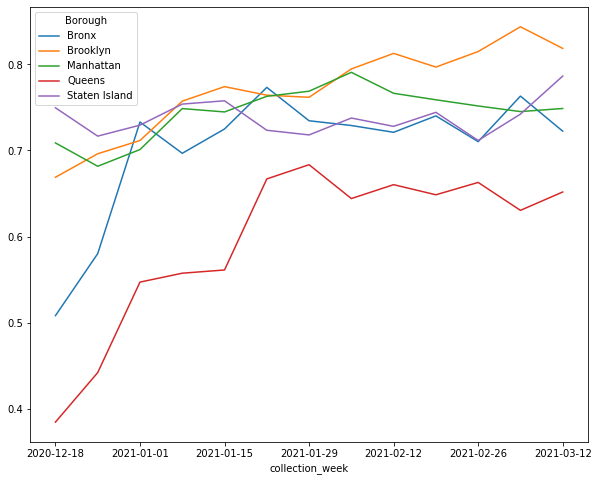

In [15]:
bor.pivot_table(index='collection_week',columns='Borough',values='icu_beds_used_pct_7_day_avg',aggfunc=sum).plot(figsize=(10,8))

In [16]:
# export bor
bor.to_csv('by_borough.csv')

### Aggregate by Hospital

In [17]:
hosp = df.groupby(['hospital_name','collection_week'])['total_icu_beds_7_day_avg','icu_beds_used_7_day_avg'].sum().reset_index()
hosp['icu_beds_used_pct_7_day_avg'] = hosp['icu_beds_used_7_day_avg'] / hosp['total_icu_beds_7_day_avg']

# reformat dates for better use by JS
hosp['collection_week'] = hosp['collection_week'].str.replace("/","-")

/Users/aseemshukla/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


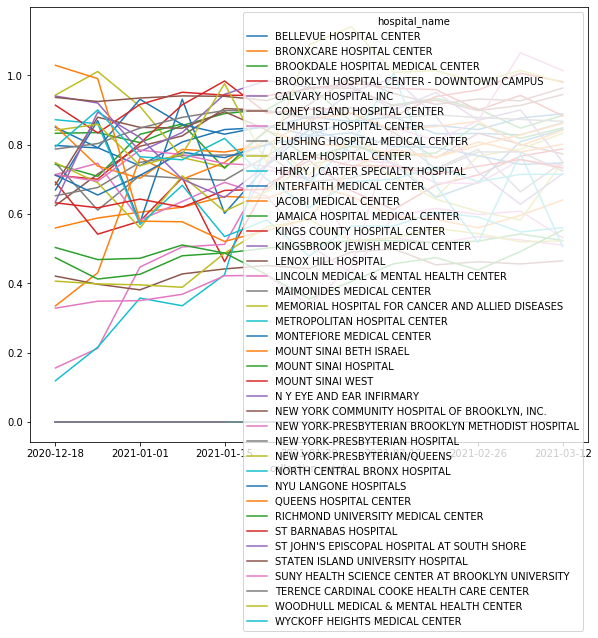

In [18]:
hosp.pivot_table(index='collection_week',columns='hospital_name',values='icu_beds_used_pct_7_day_avg',aggfunc=sum).plot(figsize=(10,8))

In [ ]:
# tasks
# map of current ICU capacity
    # total_icu_beds_7_day_average
    # icu_beds_used_7_day_avg
# chart or animated of ICU capacity over the past 90 days

# get geojson-- done
# make first graphic
# make second graphic w/ slider